In [1]:
import numpy as np
import pandas as pd

In [2]:
filename = 'Data_analysis_34'

# Read data from csv file 
df_feat = pd.read_csv(filename)
df_feat = df_feat.drop(columns = ['Activity'])
df_keys = df_feat.keys()

In [3]:
print(df_keys)
len(df_keys)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Participant', 'start_time', 'end_time',
       'acc_mean', 'acc_mean.1', 'acc_50%', 'acc_max', 'acc_eng', 'acc_var',
       'acc_skew', 'acc_kurt', 'acc_entropy', 'acc_mad', 'gyro_mean',
       'gyro_mean.1', 'gyro_50%', 'gyro_max', 'gyro_eng', 'gyro_var',
       'gyro_skew', 'gyro_kurt', 'gyro_entropy', 'gyro_mad', 'score_change'],
      dtype='object')


26

In [4]:
df = df_feat.copy()
df = df.dropna()

Xs = df[df_keys[5:25]]
y = df['score_change']

print(Xs)
print(y)

       acc_mean  acc_mean.1    acc_50%    acc_max        acc_eng   acc_var  \
0      3.258336    3.206282   3.261504   3.318868   24155.548204  0.001071   
1      3.288231    3.218016   3.294214   3.338302   24589.066281  0.000670   
2      3.307407    3.274049   3.307278   3.344048   24864.479088  0.000117   
3      3.310460    3.287662   3.312222   3.344048   24910.254371  0.000054   
4      3.311040    3.287662   3.312971   3.344048   24908.023866  0.000050   
...         ...         ...        ...        ...            ...       ...   
3581  11.702805   11.417292  11.703640  11.895382  262961.324078  0.003379   
3582  11.695273   11.417292  11.694066  11.895382  263581.173677  0.003774   
3583  11.692662   11.417292  11.694293  11.872994  265650.063209  0.003243   
3584  11.703943   11.423132  11.703998  11.872994  266023.905128  0.002225   
3585  11.709427   11.502270  11.708944  11.872994  177560.567817  0.001717   

      acc_skew  acc_kurt  acc_entropy   acc_mad  gyro_mean  gyr

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

components = []
accuracy = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print('When there is ' + str(i) + ' components:')
    print(explained_variance)
    print(sum(explained_variance))
    components.append(i)
    accuracy.append(sum(explained_variance))

When there is 1 components:
[0.37038952]
0.370389521049393
When there is 2 components:
[0.37038952 0.27273778]
0.6431272974153383
When there is 3 components:
[0.37038952 0.27273778 0.0944121 ]
0.737539396064615
When there is 4 components:
[0.37038952 0.27273778 0.0944121  0.05679204]
0.7943314372676582
When there is 5 components:
[0.37038952 0.27273778 0.0944121  0.05679204 0.0553071 ]
0.8496385382320383
When there is 6 components:
[0.37038952 0.27273778 0.0944121  0.05679204 0.0553071  0.04636585]
0.8960043878037041
When there is 7 components:
[0.37038952 0.27273778 0.0944121  0.05679204 0.0553071  0.04636585
 0.03879488]
0.934799267576657
When there is 8 components:
[0.37038952 0.27273778 0.0944121  0.05679204 0.0553071  0.04636585
 0.03879488 0.03009639]
0.9648956570629967
When there is 9 components:
[0.37038952 0.27273778 0.0944121  0.05679204 0.0553071  0.04636585
 0.03879488 0.03009639 0.0128992 ]
0.9777948586706362
When there is 10 components:
[0.37038952 0.27273778 0.0944121  0

In [6]:
# We finally found that only use 16 features (a half of the all features) can retain 99% accuracy.
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 11)
X_train_1 = pca.fit_transform(X_train)
X_test_1 = pca.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression().fit(X_train_1, y_train)

y_pred = reg.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23759898558029025
Mean Absolute Error: 0.3943365496106931
Mean Squared Error: 0.2256788588969976
Root Mean Squared Error: 0.4750566901928628


In [8]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

-0.043254532775453304
[ 0.05557781 -0.08665118  0.01920821 -0.01034166 -0.04809062  0.07167902
  0.00405309 -0.00199611  0.02550331  0.02678003  0.05969245]


In [9]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,-0.692,-0.338547
1,0.230,0.322572
2,0.230,0.361451
3,0.308,0.127773
4,0.066,0.015640
...,...,...
713,-0.587,0.206451
714,0.230,0.272285
715,-0.737,-0.250878
716,0.205,-0.155552


In [10]:
# Test the best alpha
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha' : [1e-10,1e-8,1e-4, 1e-2,0.1,0.5, 1, 5, 10]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train_1, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.23868772184697606


In [11]:


lasso = Lasso(alpha = 1e-4)
lasso.fit(X_train_1,y_train)

y_pred = lasso.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23754934994394594
Mean Absolute Error: 0.394341472969816
Mean Squared Error: 0.2256935515765179
Root Mean Squared Error: 0.47507215407400794


In [12]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha = 0.0001) # After test, this is the best alpha

model_enet.fit(X_train_1,y_train)

y_pred = model_enet.predict(X_test_1)

print(metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.23757282542018
Mean Absolute Error: 0.39433922248247993
Mean Squared Error: 0.22568660258433615
Root Mean Squared Error: 0.47506484040006175


Text(0.5, 0, 'number of components')

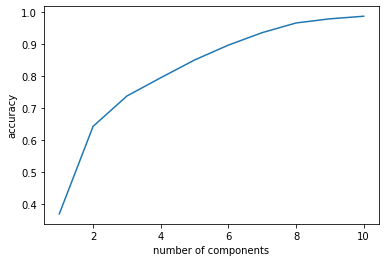

In [19]:
import matplotlib.pyplot as plt
plt.plot(components,accuracy)
plt.ylabel('accuracy')
plt.xlabel('number of components')

In [16]:
print(components)
print(accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.37038952104939354, 0.6431272974153397, 0.7375393960646152, 0.7943314372676595, 0.8496385382320376, 0.8960043878037034, 0.9347992675766584, 0.9648956570629958, 0.9777948586706362, 0.9858360540382595, 0.9910202695588612, 0.99436099550211, 0.9966363889849803]
